# Calcul du volume de l'hyper-sphère de dimension d

Le but de l'exercice est de calculer le volume de l'hypersphère en dimension $d$ définie par :

$$ 
\mathcal{S}_d = \{ (x_1, \ldots, x_n) \in \mathbb{R}^d \; : \; \sum_{i=1}^d x_i^2 = 1\}
$$

Le volume de la sphère se définit par l'intégrale de la boule $\mathcal{B}_d = \{ (x_1, \ldots, x_n) \in \mathbb{R}^d \; : \; \sum_{i=1}^d x_i^2 \leq 1\} $:

$$ 
\int_{\mathcal{B}_d} dx = \int_{\mathbb{R}^d} \mathbb{1}_{\mathcal{B}_d}(x) dx
$$

On se restreint à l'hyper-cube $[0;1]^d$, le volume total se déduisant par symmétrie. Deux méthodes sont explorées :

* Méthodes des rectangles
* Monte Carlo


##  Exercice 1 : Méthodes des rectangles
On approxime une fonction $f : [0;1]^d \to \mathbb{R}$ par sa somme de Riemann d'ordre $N$ :

\begin{equation}
\int_{[0;1]^d} f(p) dp \approx \left(\frac{1}{N}\right)^d \sum_{p_1, \ldots, p_d} f(p_1, \ldots, p_d),
\end{equation}

où $p_i \in \{0, \frac{1}{N}, \ldots, \frac{N-1}{N} \}, \forall i =1,\ldots, d$.

#### Question 1

Coder `quadrillage(d, N)` qui renvoie le pavage du premier quadrant en dimension $d$, *i.e* les points de $\{0, \frac{1}{N}, \ldots, \frac{N-1}{N} \}^d$. Il y en a $N^d$ distincts, le résultat doit être sous la forme d'un `numpy.array` de shape `(N^d,d)`. Afficher ce quadrillage avec à l'aide de matplotlib.

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt 

In [2]:
def quadrillage(d, N):
    """
    Function that return the cartesian product of {0, 1/N, ..., N-1/N}^d
    """
    a = np.array([i/N for i in range(N)]) # {0, 1/N, ..., N-1/N}
    P = np.zeros((N**d, d))
    
    i=0
    for l in itertools.product(*(a for j in range(d))):
        P[i,] = np.array(l)
        i+=1
    
    return(P)

def quadrillage2(d, N):
    """
    Same that quadrillage() but using full Numpy functionalities. 
    The order of appearance might not be the same though.
    """
    a = np.array([i/N for i in range(N)])
    P = np.array(np.meshgrid(*(a for j in range(d)))).T.reshape(-1,d)
    
    return(P)

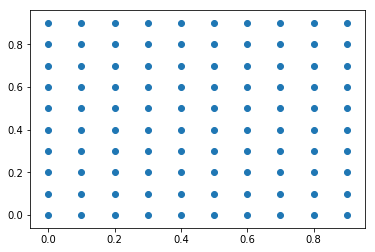

In [3]:
# Exemple pour d=2
d=2
N=10

P = quadrillage(d=d, N=N)
plt.scatter(P[:,0], P[:,1])

#### Question 2

Coder la fonction indicatrice de la sphère de dimension $d$

\begin{equation}
f : p \in [0;1]^d \mapsto f(p) = \mathbb{1}_{\mathcal{S}}(p)
\end{equation}

In [4]:
def f(p):
    """
    Indicator function of the eauclidean ball
    Takes a (d,)-shape numpy array
    return : 1 if p is in the ball, else 0
    """
    
    temp = np.sum(p**2)
    if temp <= 1:# verif que p est bien dans l'ensemble de définition de f
        return(1)
    else:
        return(0)

#### Question 3

Écrire une fonction `Rectangle(d,N)` qui prend en entrée une dimension d et un entier N et
renvoie une estimation du volume contenu dans l’hypershpère en dimension d par la méthode des rectangles,  pour $d \geq 1$.

In [5]:
def Rectangle(d, N):
    
    assert d >= 1, 'dimension should be greater than 1'
    P = quadrillage(d, N)
    vol = 0
    for i in range(P.shape[0]):
        vol += f(P[i,:])
        
    vol /= N**d
    
    return(2**d*vol)

def Rectangle2(d, N):
    """
    Same but Numpy-er
    """
    assert d >= 1, 'dimension should be greater than 1'
    P = quadrillage(d, N)
    vol = np.sum(np.apply_along_axis(f, 1, P)) / N**d

    return(2**d*vol)

assert np.allclose(Rectangle(2,10), Rectangle2(2, 10))

#### Question 4 

Approximer le volume de l'hyper-sphère pour $d=1, 2, 3$ et $4$. Afficher l'évolution du volume en fonction de $d$. Que constatez-vous quand $N$ augmente ?

In [6]:
ds = [1,2,3, 4]
N = 10
theoretical_values = [2, np.pi, (4/3)*np.pi, (1/2)*np.pi**2, (8/15)*np.pi**2]

vols = []
for i in range(len(ds)):
    d = ds[i]
    vols.append(Rectangle(d, N))
    print('En dimension {0} l\'erreur théorique est de {1}'.format(d, np.abs(theoretical_values[i] - vols[i])))

En dimension 1 l'erreur théorique est de 0.0
En dimension 2 l'erreur théorique est de 0.3784073464102069
En dimension 3 l'erreur théorique est de 0.9712097952136096
En dimension 4 l'erreur théorique est de 1.8747977994553207


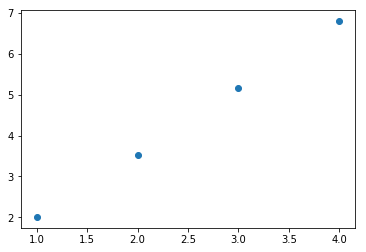

In [7]:
plt.scatter(ds, vols)

#### Question 5 : Gagner un facteur N

On peut en fait utiliser la même méthode de manière moins naïve. Il s'agit de voir la sphère en dimension $d+1$ comme une fontion de $\mathbb{R}^{d} \to \mathbb{R}$. La fonction définissant l'hypersphère de dimension $d+1$, prend un point de la boulde $\mathcal{B}(0,1)$ et lui associe sa "hauteur" (intuition valable en dimension 3), elle s'écrit :

\begin{equation}
f_2(p) =  \left( \begin{array}{cl}
(1 - \sum_1^d p_i^2)^{1/2} & \textrm {si p appartient à la boule euclidienne  (dans } \mathbb{R}^{d}\textrm{) de centre 0 et de rayon 1.} \\
 0 & \textrm{sinon}
\end{array} \right.
\end{equation}

De cette manière, il suffit de générer $N^{d-1}$ au lieu des $N^d$ des questions précédentes. Cette méthodes fait donc gagner un facteur $N$.

Coder la nouvelle fonction `f`.

Ecrire une fonction `Rectangle2(d,N)` qui prend en entrée une dimension d et un entier N et
renvoie une estimation du volume contenu dans l’hypersphère en dimension d par la méthode des rectangles pour cette nouvelle fonction $f_2$,  pour $d \geq 2$.

Reproduire le graphique de la question 4 en essayant d'augmenter `N`.

In [8]:
def f2(p):
    """
    """
    temp = np.sum(p**2)  
    if temp <= 1:
        return(np.sqrt(1 - temp ))
    else:
        return(0)

def Rectangle2(d, N):
    
    assert d >= 2, 'dimension should be greater than 2'
    P = quadrillage(d-1, N)
    vol = 0
    for i in range(P.shape[0]):
        vol += f2(P[i,:])
        
    vol /= N**(d-1)
    
    return(2**d*vol)

En dimension 2 l'erreur théorique est de 0.018824378189251867
En dimension 3 l'erreur théorique est de 0.0628573040612288
En dimension 4 l'erreur théorique est de 0.12656849509754942


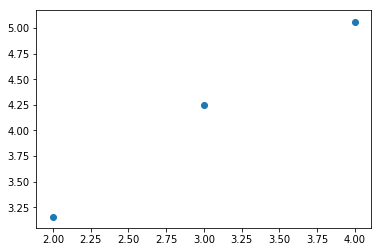

In [9]:
N = 10
ds = range(2, 4+1)
vols = []
N = 100
for i in range(len(ds)):
    d = ds[i]
    vols.append(Rectangle2(d, N))
    print('En dimension {0} l\'erreur théorique est de {1}'.format(d, np.abs(theoretical_values[i+1] - vols[i])))

plt.scatter(ds, vols)

L'erreur théorique commise grandit avec $d$. De plus, on voit que pour $d=4$ le calcul (la génération de $N^d$ points) prend beaucoup de temps, même pour de très petites valeurs de $N$. Il nous faut donc trouver une méthode alternative si l'on veut espérer approximer le volume en un temps raisonnable. c'est le but de l'exercice 2, avec un détour par *l'aléatoire*.

# Exercice 2 : Monte-Carlo

La méthode de Monte-Carlo consiste dans le fait de tirer au hasard des points dans un volume
de type $[0, 1]^d$, de manière uniforme (pour la méthode la plus simple), et de déduire le volume
de l’hypersphère (plus exactement, la partie de l’hypersphère contenue dans le premier cadran) comme la proportion de points vérifiant l’inégalité $\sum_i x_i^2 \leq 1$.

#### Question 1 

Écrire une fonction `MonteCarlo(d, N)`  qui prend en entrée une dimension d et un entier N et
renvoie une estimation du volume contenu dans l’hypershpère
P d en dimension d comme proportion
de points tirés de manière uniforme vérifiant l’inégalité $\sum_i x_i^2 \leq 1$

In [10]:
def MonteCarlo(d, N):
    
    count = 0
    for _ in range(int(N)):
        temp = np.random.uniform(size=d)
        if np.sum(temp**2) <= 1:
            count +=1
    return( 2**d * (count / N))

#### Question 2

Trouver une estimation du volume pour $d = 1$ à $9$. Afficher l'évolution du volume en fonction de $d$. Que constatez-vous?

In [11]:
N = 5e4 # avec 4 000 points
ds = np.arange(9) + 1
vols = []
for d in ds:
    vols.append(MonteCarlo(d, N))

In [12]:
for d in range(len(theoretical_values)):
    print('En dimension {0} l\'erreur théorique est de {1}'.format(d+1, np.abs(theoretical_values[d] - vols[d])))

En dimension 1 l'erreur théorique est de 0.0
En dimension 2 l'erreur théorique est de 0.00032734641020670807
En dimension 3 l'erreur théorique est de 0.012169795213609724
En dimension 4 l'erreur théorique est de 0.00712220054467938
En dimension 5 l'erreur théorique est de 0.012370986085675995


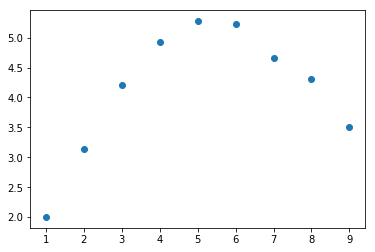

In [13]:
plt.scatter(ds, vols)

# Conclusion

Des 2 méthodes (déterministes vs stochastiques) on constate que c'est la seconde la plus efficace en grande dimension. En effet, la génération de $N^{d-1}$ pour la méthode des rectangles n'est pas envisageable même pour des petites valeurs de $N$ et $d$. 

On voit aussi que le volume de la sphère unité en dimension $d$ atteint un maximum en $d=5$ pour décroitre ensuite. C'est un phénomène courant de la grande dimension. Parfois appelé *fléau de la grande dimension*, bien exploité il peut aussi être une bénédiction, c'est même la base des méthodes à noyaux en machine learning ! Cf. [Cours de Stpéhane Mallat](https://www.college-de-france.fr/site/stephane-mallat/course-2017-2018.htm)